want to know avg # of ppl to come to concert


In [15]:
options(repos = c('https://cloud.r-project.org/'))
options(digits=3)
install.packages(c("ggplot2", "dplyr", "sciplot", "reshape", "TeachBayes"))
#library(sciPlot)

Installing packages into 'C:/Users/nrb75/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'sciplot' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'TeachBayes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nrb75\AppData\Local\Temp\RtmpuQfqZW\downloaded_packages


In [27]:
size=sort(c(5,8,3,12,10,8,6,17,11,5,9,10,12,6))
Model=seq(3,17,1) #want to determine which model is most likely, i.e., which crowd size is most likely
Prior=round(rep(1/15, 15),3)
ybar=mean(size)
sd_size=sd(size)

df_size=data.frame(Model, Prior)
df_size


Model,Prior
3,0.067
4,0.067
5,0.067
6,0.067
7,0.067
8,0.067
9,0.067
10,0.067
11,0.067
12,0.067


In [ ]:
Create Likelihood that each model (crowd size) is true, given the observed collected data.

In [28]:
df_size$Likelihood=dnorm(ybar, mean=Model, sd=sd_size) #dnorm is a density function that calculates the relative likelihood that the value of the random variable would equal that sample. 
#Likelihood is calculated based on a normal distribution with the observed Models serving as possible means, and standard deviation is the observed sd
#here the density, or probability of observing that point, for the observed average (ybar) is calculated for a normal distribution with each of the Model means.

df_size


Model,Prior,Likelihood
3,0.067,0.03231
4,0.067,0.04762
5,0.067,0.06514
6,0.067,0.08272
7,0.067,0.09752
8,0.067,0.10673
9,0.067,0.10845
10,0.067,0.10229
11,0.067,0.08958
12,0.067,0.07282


Calculate the Posterior distribution

In [29]:
df_size$Product = df_size$Prior* df_size$Likelihood
df_size$Posterior=df_size$Product/sum(df_size$Product)
df_size

Model,Prior,Likelihood,Product,Posterior
3,0.067,0.03231,0.002165,0.03411
4,0.067,0.04762,0.003190,0.05027
5,0.067,0.06514,0.004364,0.06876
6,0.067,0.08272,0.005542,0.08732
7,0.067,0.09752,0.006534,0.10295
8,0.067,0.10673,0.007151,0.11267
9,0.067,0.10845,0.007266,0.11448
10,0.067,0.10229,0.006854,0.10799
11,0.067,0.08958,0.006002,0.09456
12,0.067,0.07282,0.004879,0.07687


A good check is that the sum of the Posterior probabilities = 1.

In [30]:
sum(df_size$Posterior)

[1] 1

Good, the sum of the posterior probabilities = 1, as expected.

Let's take a look at the probability density plot to see how likely crowd sizes are:

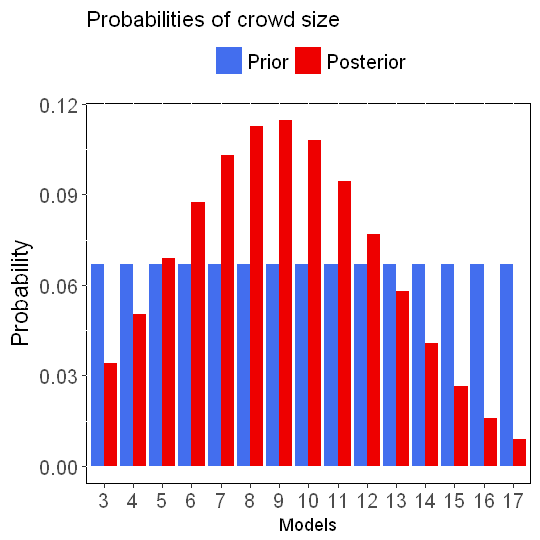

In [31]:
options(repr.plot.width=4.5, repr.plot.height=4.5)
library(reshape)
library(ggplot2)

df.long=melt(df_size, id="Model")

plt.std=plt.std=theme(legend.position="top", legend.text = element_text(size=12), axis.text.x = element_text(size=12),  axis.text.y = element_text(size=12), axis.title.y = element_text(size=14), strip.text.x = element_text(size=16), panel.background = element_rect(fill='white', colour='black'), legend.key = element_blank())
color1=c("royalblue2", "red2")
ggplot(data=subset(df.long, variable%in% c("Prior", "Posterior")), aes(x=as.factor(Model), y=value, fill=variable))+geom_bar(stat="identity", position="dodge")+ylab("Probability")+scale_fill_manual(values=color1, name="")+xlab("Models of crowd size")+ggtitle("Probabilities of crowd size")+plt.std